## Exploratory Data Analysis (EDA) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose


In [3]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pmdarima as pm
import statsmodels.tsa.stattools as ts
# Metric library
from sklearn.metrics import mean_squared_error
import math

In [4]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('tst.csv')
df = pd.read_csv('new_data1.csv')




## Train data 

In [5]:
df1.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560.0,1.0,55.0,1885.0,136.83,152.29,0.0,0.0,177.0
1,1466964.0,1.0,55.0,1993.0,136.83,135.83,0.0,0.0,270.0
2,1346989.0,1.0,55.0,2539.0,134.86,135.86,0.0,0.0,189.0
3,1338232.0,1.0,55.0,2139.0,339.50,437.53,0.0,0.0,54.0
4,1448490.0,1.0,55.0,2631.0,243.50,242.50,0.0,0.0,40.0


In [6]:
df1.shape

(456550, 9)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456550 entries, 0 to 456549
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  float64
 1   week                   456548 non-null  float64
 2   center_id              456548 non-null  float64
 3   meal_id                456548 non-null  float64
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  float64
 7   homepage_featured      456548 non-null  float64
 8   num_orders             456548 non-null  float64
dtypes: float64(9)
memory usage: 31.3 MB


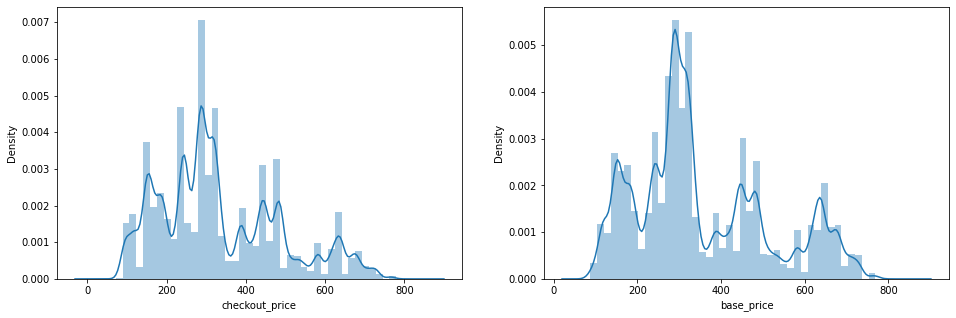

In [8]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['checkout_price'])
plt.subplot(1,2,2)
sns.distplot(df1['base_price'])
plt.show()

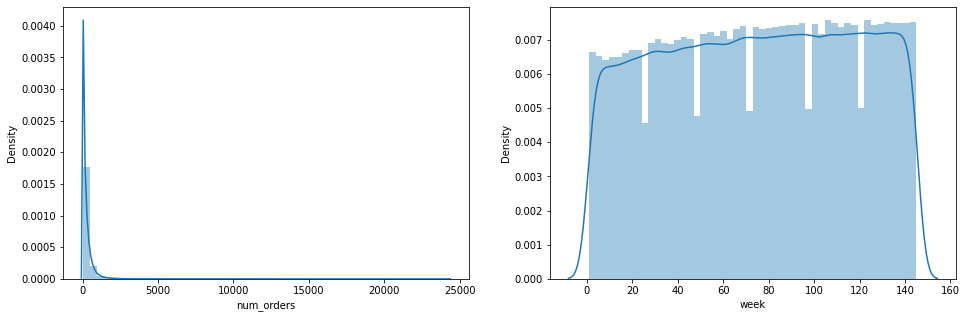

In [9]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df1['num_orders'])
plt.subplot(1,2,2)
sns.distplot(df1['week'])
plt.show()

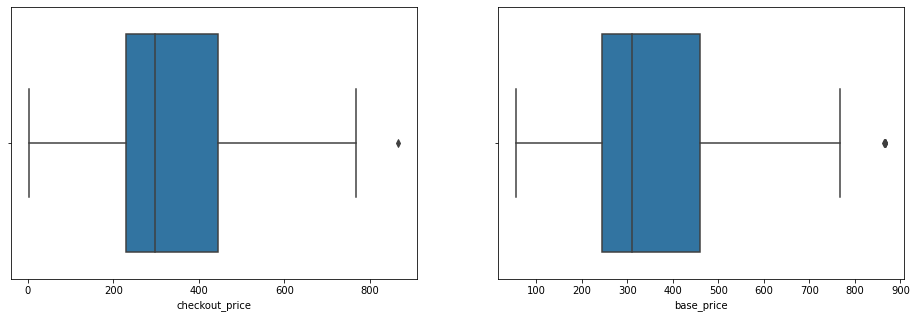

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df1['checkout_price'])
plt.subplot(1,2,2)
sns.boxplot(df1['base_price'])
plt.show()


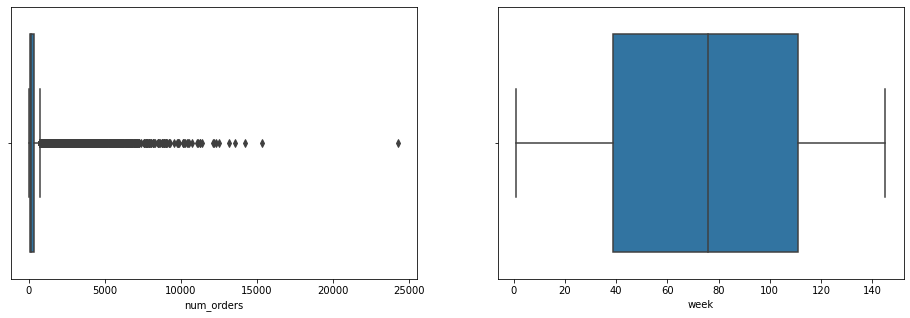

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df1['num_orders'])
plt.subplot(1,2,2)
sns.boxplot(df1['week'])
plt.show()

## Detection And Removal Of Outliers

In [12]:
columns=['num_orders','checkout_price','base_price',]
new_df_cap = df1.copy()
for elements in columns: 
    percentile25 = df1[elements].quantile(0.25)
    percentile75 = df1[elements].quantile(0.75)
    iqr=percentile75-percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df1[df1[elements] > upper_limit]
    df1[df1[elements] < lower_limit]
    new_df= df1[df1[elements] < upper_limit]
    new_df_cap[elements] = np.where(
        new_df_cap[elements] > upper_limit,
        upper_limit,
        np.where(
            new_df_cap[elements] < lower_limit,
            lower_limit,
            new_df_cap[elements]
        )
    )


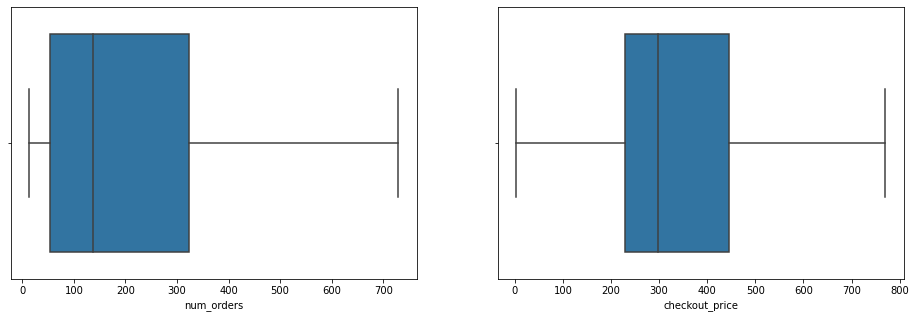

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(new_df_cap['num_orders'])
plt.subplot(1,2,2)
sns.boxplot(new_df_cap['checkout_price'])
plt.show()


<AxesSubplot:xlabel='base_price'>

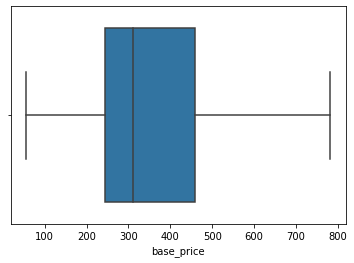

In [14]:
sns.boxplot(new_df_cap['base_price'])



In [15]:
new_df_cap = new_df_cap.dropna()


In [16]:
x = new_df_cap.drop('num_orders',1)
y = new_df_cap['num_orders']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=104)

In [17]:
y_train.head()

83087     567.0
233089    177.0
389131     67.0
322419    123.0
169613    177.0
Name: num_orders, dtype: float64

In [18]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  112.5233715972984


In [19]:
xgb = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y_pred)))

[11:15:54] WARNING: ../src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE:  135.37199760373795


In [ ]:
from sklearn import tree
tree.plot_tree(dt)

In [20]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('RMSE: ',math.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  82.63162771658382


In [21]:
import pmdarima as pm
import statsmodels.tsa.stattools as ts

In [22]:
np.random.seed(7)

In [23]:
df = pd.read_csv('new_data1.csv')
df


,week,num_orders
0,1,177
1,2,323
2,3,96
3,4,163
4,5,215
...,...,...
140,141,107
141,142,121
142,143,176
143,144,162


In [24]:
DF1=df['num_orders']
DF1

0      177
1      323
2       96
3      163
4      215
      ... 
140    107
141    121
142    176
143    162
144    121
Name: num_orders, Length: 145, dtype: int64

In [25]:
dataset=np.array(DF1,dtype=float)
dataset

array([177., 323.,  96., 163., 215., 285., 148., 135., 175., 175., 244.,
       190.,  68., 135., 366.,  67., 270., 350., 244., 188., 136., 296.,
       188., 161.,  55., 176., 202., 296., 107., 135., 203., 123., 215.,
       231., 284., 161., 188., 175., 270., 298., 323., 351., 378., 419.,
       256., 460., 350., 366., 433., 513., 284., 406., 500., 404., 419.,
       323., 782., 284., 203., 271., 432., 108., 432., 231., 298., 391.,
       420., 188., 391., 485., 351., 377., 175., 379., 404., 269., 257.,
       230., 284., 271., 163., 148., 242., 216., 231., 204., 256., 377.,
       258., 271., 244., 231., 176., 107., 257., 271., 203., 134., 109.,
       163., 242., 203., 406., 244., 229., 230., 283., 149., 244., 161.,
       135.,  68., 243., 148.,  55.,  69., 162., 176., 123., 148.,  94.,
       123., 217., 296., 109.,  94., 231.,  40.,  94.,  95., 162., 162.,
       122.,  82., 216., 134.,  96.,  81.,  67., 204., 107., 121., 176.,
       162., 121.])

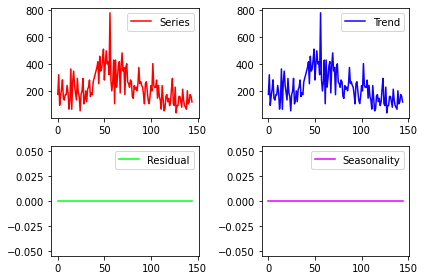

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition=seasonal_decompose(dataset, model='additive', freq=1)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(221)
plt.plot(dataset,color='#ff0000', label='Series')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend,color='#1100ff', label='Trend')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(223)
plt.plot(residual,color='#00ff1a', label='Residual')
plt.legend(loc='best')
plt.tight_layout()
plt.subplot(224)
plt.plot(seasonal,color='#de00ff', label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

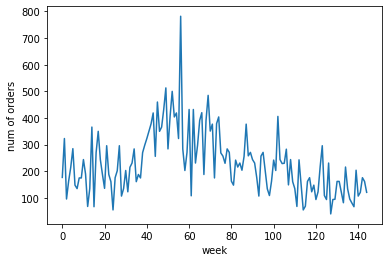

In [27]:
plt.plot(dataset)
plt.xlabel('week')
plt.ylabel('num of orders')
plt.show()

In [28]:
train_df=dataset[:100]
train_df

array([177., 323.,  96., 163., 215., 285., 148., 135., 175., 175., 244.,
       190.,  68., 135., 366.,  67., 270., 350., 244., 188., 136., 296.,
       188., 161.,  55., 176., 202., 296., 107., 135., 203., 123., 215.,
       231., 284., 161., 188., 175., 270., 298., 323., 351., 378., 419.,
       256., 460., 350., 366., 433., 513., 284., 406., 500., 404., 419.,
       323., 782., 284., 203., 271., 432., 108., 432., 231., 298., 391.,
       420., 188., 391., 485., 351., 377., 175., 379., 404., 269., 257.,
       230., 284., 271., 163., 148., 242., 216., 231., 204., 256., 377.,
       258., 271., 244., 231., 176., 107., 257., 271., 203., 134., 109.,
       163.])

In [29]:
test_df=dataset[100:128]


In [30]:
window_size = 7

numbers_series = pd.Series(train_df)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()

moving_averages_list = moving_averages.tolist()
ts7 = moving_averages_list[window_size - 1:]
ts7=np.array(ts7)
print(ts7)

[201.         195.         173.85714286 185.14285714 196.71428571
 193.14285714 162.14285714 160.28571429 193.28571429 177.85714286
 191.42857143 206.57142857 214.28571429 231.42857143 231.57142857
 221.57142857 238.85714286 223.28571429 181.14285714 171.42857143
 173.42857143 196.28571429 169.28571429 161.71428571 167.71428571
 177.42857143 183.         187.14285714 185.42857143 193.14285714
 200.71428571 196.71428571 217.71428571 229.57142857 242.71428571
 252.28571429 283.28571429 316.28571429 327.85714286 355.
 362.42857143 368.57142857 380.28571429 399.57142857 380.28571429
 401.71428571 407.42857143 415.14285714 422.71428571 407.
 445.42857143 445.42857143 416.42857143 383.71428571 387.71428571
 343.28571429 358.85714286 280.14285714 282.14285714 309.
 330.28571429 295.42857143 335.85714286 343.42857143 360.57142857
 371.85714286 341.         335.14285714 366.         348.57142857
 316.         298.71428571 285.42857143 299.14285714 268.28571429
 231.71428571 227.85714286 222.   

In [31]:
#Dickey-Fuller Test
result = ts.adfuller(train_df, 1)
result

(-4.120829925672765,
 0.0008945261493785132,
 1,
 98,
 {'1%': -3.4989097606014496,
  '5%': -2.891516256916761,
  '10%': -2.5827604414827157},
 1199.2608105046345)

In [33]:
Arima_model=pm.auto_arima(train_df, start_p=0, start_q=0, max_p=10, max_q=10, start_P=0, start_Q=0, max_P=10, max_Q=10, m=7, stepwise=True, seasonal=True, information_criterion='aic', trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=1236.205, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=1186.632, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.33 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=1212.310, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=1178.079, Time=0.41 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=1178.076, Time=0.54 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=1162.147, Time=1.28 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=1159.512, Time=2.31 sec
 ARIMA(1,1,0)(6,1,0)[7]             : AIC=1161.467, Time=4.06 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=inf, Time=8.32 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=4.24 sec
 ARIMA(1,1,0)(6,1,1)[7]             : AIC=inf, Time=8.27 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=1183.134, Time=1.53 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=1149.552, Time=2.72 sec
 ARIMA(2,1,0)(4,1,0)[7]             : AIC=1151.216, T

In [34]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=28), index=test_df)
prediction=np.array(prediction)

In [35]:
prediction

array([[176.67465963],
       [195.70423778],
       [111.6946322 ],
       [186.94746719],
       [197.15390557],
       [126.87060483],
       [145.51647292],
       [ 61.09010498],
       [175.63006841],
       [156.20603778],
       [116.48547375],
       [ 91.41640241],
       [ 64.43428916],
       [ 88.76128146],
       [ 72.12998325],
       [ 85.63511126],
       [ 46.47635127],
       [ 85.52592857],
       [ 61.7247201 ],
       [ 43.39599209],
       [ 41.29116865],
       [ 34.4891421 ],
       [128.13471123],
       [ 62.59960711],
       [ 66.88760727],
       [ 40.87190428],
       [ 14.89417336],
       [  7.53458208]])

In [36]:
mse = mean_squared_error(test_df, prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 109.477577


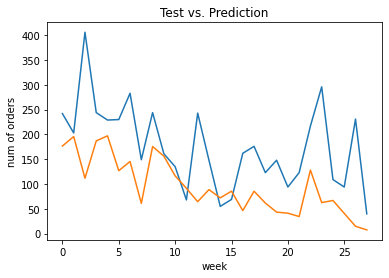

In [37]:
plt.plot(test_df)
plt.plot(prediction)
plt.xlabel('week')
plt.ylabel('num of orders')
plt.title("Test vs. Prediction")
plt.show()

In [38]:
test = pd.read_csv('tst.csv')


In [39]:
f_test = pd.get_dummies(test)


In [40]:
pred = rf.predict(f_test)

In [41]:
test['num_orders'] = pred

In [42]:
sample =  test.loc[:,['id','num_orders']]

In [43]:
sample.head()

,id,num_orders
0,1028232,147.53
1,1127204,130.69
2,1212707,259.15
3,1082698,73.34
4,1400926,57.11
